TO DOWNLOAD DATA SET I USED **BING DOWNLOADER** 

In [1]:
!pip freeze | grep scikit-learn

scikit-learn==0.23.2


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
Data= '/content/drive/MyDrive/images/'
category=['bulldog','maltese','dachshund','germanshepherd','siberianhusky']
target = []
flat_data =[]
images=[]
for i in category:
  class_num=category.index(i)
  path = os.path.join(Data,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3)) 
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install -U ipykernel

Requirement already up-to-date: ipykernel in /usr/local/lib/python3.6/dist-packages (5.4.2)


In [4]:
!pip install ipython-autotime
%load_ext autotime

time: 575 µs


In [5]:
flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

time: 73.3 ms


In [6]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

time: 8 ms


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=0)

time: 143 ms


In [8]:
#grid search cv
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 2min 48s


In [9]:
y_pred=clf.predict(x_test)
y_pred

array([1, 4, 3, 2, 3, 4, 2, 2, 0, 4, 2, 1, 3, 1, 1, 0, 0, 4, 0, 0, 2, 3,
       0, 3, 2, 2, 1, 0, 2, 3])

time: 220 ms


In [10]:
y_test

array([1, 4, 0, 2, 3, 4, 0, 3, 2, 4, 2, 4, 3, 0, 0, 1, 1, 1, 1, 0, 2, 3,
       0, 3, 2, 2, 0, 4, 4, 3])

time: 4.6 ms


In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 996 µs


In [12]:
accuracy_score(y_pred,y_test)*100 

53.333333333333336

time: 3.59 ms


In [13]:
confusion_matrix(y_pred,y_test)

array([[2, 3, 1, 0, 1],
       [3, 1, 0, 0, 1],
       [1, 0, 5, 1, 1],
       [1, 0, 0, 5, 0],
       [0, 1, 0, 0, 3]])

time: 4.31 ms


In [14]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 72.3 ms


In [15]:
import pickle
pickle.dump(clf,open('img_model.pkl','wb'))

time: 75.4 ms


In [16]:
model = pickle.load(open('img_model.p','rb'))

time: 22 ms


Enter url:https://i.pinimg.com/originals/5d/68/a7/5d68a7b8d64b07457a01c4132321abad.jpg
predicted output is:[2]


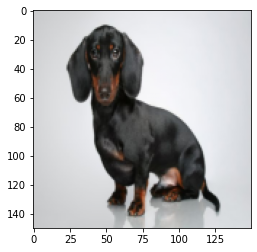

time: 4.58 s


In [19]:
#TESTING A NEW IMAGE
flat_data=[]
url=input('Enter url:')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
#y_out = category[y_out[0]]
print(f'predicted output is:{y_out}')

In [18]:
!pip install streamlit
!pip install pyngrok

     |████████████████████████████████| 7.4MB 5.6MB/s 
     |████████████████████████████████| 112kB 51.7MB/s 
     |████████████████████████████████| 102kB 11.4MB/s 
     |████████████████████████████████| 163kB 47.6MB/s 
     |████████████████████████████████| 4.5MB 46.0MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=cef116b27ea274073ebcc70f48f7a4ebe3f262d148754a9617fc38bab021e816
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
  Created wheel for watchdog: filename=watchdog-1.0.1-cp36-none-any.whl size=72206 sha256=a1758b9463dd9e398ebf311b6792b04bc9b5fe076dcebfae7f41b169893ab116
  Stored in directory: /root/.cache/pip/wheels/d8/ce/d8/31a48288b5728794feda5ac479fa324cc1cde4398c29eff064
Successfully built blinker watchdog
  Created wheel for pyngrok: filename=pyngrok-5.0.0-cp36-none-any.whl size=18781 sha256=c95b1e0f2d0721cdbf16071

In [ ]:
!ngrok authtoken 1kiJ4Z64wygfL3HW4ZTkLAOBIoo_3BkJi8EScMCYJgMY6epc3

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
time: 3.25 s


In [ ]:
%%writefile app.py
import streamlit as st
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import sklearn

category=['bulldog','maltese','dachshund','germanshepherd','siberianhusky']

model = pickle.load(open('img_model.p','rb'))

def func(url):
  flat_data=[]
  img=imread(url)
  img_resized=resize(img,(150,150,3))
  flat_data.append(img_resized.flatten())
  flat_data=np.array(flat_data)
  plt.imshow(img_resized)
  y_out=model.predict(flat_data)
  y_out = category[y_out[0]]
  return y_out

def main():
  st.title('Image Classifier')
  st.subtitle("Breeds of Dogs")
  st.write("Enter url of image")
  url_input = st.text_input()
  predict_button = st.button("Predict")
  if predict_button:
    result = func(url_input)
    st.success('Type: {}'.format(result))


if __name__=="__main__":
  main()

Overwriting app.py
time: 8.7 ms


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'
time: 137 ms


In [ ]:
from pyngrok import ngrok
url = ngrok.connect(port=8501)
url

<NgrokTunnel: "http://48ceb4be6320.ngrok.io" -> "http://localhost:80">

time: 1.26 s


In [ ]:
!cat /content/nohup.out


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.185.168.108:8501

time: 124 ms


In [ ]:
ngrok.kill()

time: 7.02 ms
